In [1]:
import numpy as np
import sys
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import datetime
np.set_printoptions(threshold=sys.maxsize)
pd.options.display.max_rows=9999

Using TensorFlow backend.


In [2]:
dataset1=read_csv('County_data/CO-EST2019-alldata.csv')
df=dataset1[['STATE','COUNTY','POPESTIMATE2016']]
# print('df \n',df)
dfnp=df.to_numpy()
dfnpi=dfnp.astype(int)
print('dfnp.shape',dfnp.shape)
fipsa=np.zeros(dfnp.shape[0])
pop=np.zeros((dfnp.shape[0]-50,2))
jj=0
for ii in range(dfnp.shape[0]):
    if dfnp[ii,1] == 0:
        continue
    if dfnp[ii,1]<10:
        d1='00'+str(dfnp[ii,1])
    elif dfnp[ii,1]<100:
        d1='0'+str(dfnp[ii,1])
    else:
        d1=str(dfnp[ii,1])

    fipsa[ii]=str(dfnp[ii,0])+d1
    pop[jj,0]=str(dfnp[ii,0])+d1
    pop[jj,1]=dfnp[ii,2]
    jj+=1
#    fips=fipsa.astype(int)
#    print('state',dfnp[ii,0],'county',dfnp[ii,1],'d1',d1,'fipsa',fipsa[ii])
    
pop=pop.astype(int)
fipsp=pop[:,0]
# print('pop',pop)

dfnp.shape (3193, 3)


In [3]:
datatype=7 # 0 for confirmed, 1 for death, 2 for recovered, 3 death county US
ipoprho=2 # this is specific to datatype=4, if = 1 then read in population density
#           data and make columns for that. Otherwise be sure to set to 0

if datatype == 7 or datatype == 8:
#    dataset1=read_csv('Hopkins_US_deaths_county_08112020.csv')
#    dataset1=read_csv('Coronavirus_case7_test.csv')
    dataset1=read_csv('Hopkins_US_deaths_county_08302020.csv')
    dataset2=read_csv('vote_2016_county.csv')
    dataset3=read_csv('State_Data/US_Governors_2019.csv')

dataset1.shape (3340, 233) dataset3.shape (50, 43) govs1.shape (50, 43)
govs1[4,6] democrat
dd1.shape (3256, 233)
dd1.shape (3142, 233)
dd1.shape (3142, 233) vote1.shape (3141, 11) dd1d.shape (3142, 221)
counts 0 fips 1000.0 state_list[counts] ['01000', 'ALABAMA']
counts 1 fips 2000.0 state_list[counts] ['02000', 'ALASKA']
counts 2 fips 4000.0 state_list[counts] ['04000', 'ARIZONA']
counts 3 fips 5000.0 state_list[counts] ['05000', 'ARKANSAS']
counts 4 fips 6000.0 state_list[counts] ['06000', 'CALIFORNIA']
counts 5 fips 8000.0 state_list[counts] ['08000', 'COLORADO']
counts 6 fips 9000.0 state_list[counts] ['09000', 'CONNECTICUT']
counts 7 fips 10000.0 state_list[counts] ['10000', 'DELAWARE']
counts 8 fips 11000.0 state_list[counts] ['11000', 'DISTRICT OF COLUMBIA']
counts 9 fips 12000.0 state_list[counts] ['12000', 'FLORIDA']
counts 10 fips 13000.0 state_list[counts] ['13000', 'GEORGIA']
counts 11 fips 15000.0 state_list[counts] ['15000', 'HAWAII']
counts 12 fips 16000.0 state_list[co

ii 203 FIPS 6033 Rd 5752.0 Dd 6240.0 Pop 44538.5 turnout 0.269 
ii 204 FIPS 6035 Rd 7574.0 Dd 2224.0 Pop 21411.6 turnout 0.458 
ii 205 FIPS 6037 Rd 620285.0 Dd 1893770.0 Pop 7043372.2 turnout 0.357 
ii 206 FIPS 6039 Rd 19221.0 Dd 13283.0 Pop 107302.7 turnout 0.303 
ii 207 FIPS 6041 Rd 17531.0 Dd 86650.0 Pop 181603.8 turnout 0.574 
ii 208 FIPS 6043 Rd 5185.0 Dd 3122.0 Pop 12166.3 turnout 0.683 
ii 209 FIPS 6045 Rd 3571.0 Dd 6905.0 Pop 60835.0 turnout 0.172 
ii 210 FIPS 6047 Rd 18486.0 Dd 21856.0 Pop 186528.6 turnout 0.216 
ii 211 FIPS 6049 Rd 2413.0 Dd  798.0 Pop 6245.5 turnout 0.514 
ii 212 FIPS 6051 Rd 2080.0 Dd 2696.0 Pop 9947.8 turnout 0.480 
ii 213 FIPS 6053 Rd 26378.0 Dd 64733.0 Pop 302452.1 turnout 0.301 
ii 214 FIPS 6055 Rd 11946.0 Dd 26161.0 Pop 98161.2 turnout 0.388 
ii 215 FIPS 6057 Rd 14686.0 Dd 16199.0 Pop 68939.4 turnout 0.448 
ii 216 FIPS 6059 Rd 472669.0 Dd 556544.0 Pop 2205899.3 turnout 0.467 
ii 217 FIPS 6061 Rd 78977.0 Dd 61969.0 Pop 264111.8 turnout 0.534 
ii 218 FIP

ii 417 FIPS 13061 Rd  566.0 Dd  697.0 Pop 2094.4 turnout 0.603 
ii 418 FIPS 13063 Rd 11740.0 Dd 75908.0 Pop 194686.6 turnout 0.450 
ii 419 FIPS 13065 Rd 1724.0 Dd  685.0 Pop 4699.0 turnout 0.513 
ii 420 FIPS 13067 Rd 152602.0 Dd 159416.0 Pop 521457.4 turnout 0.598 
ii 421 FIPS 13069 Rd 9575.0 Dd 4090.0 Pop 29905.6 turnout 0.457 
ii 422 FIPS 13071 Rd 9892.0 Dd 3460.0 Pop 31662.6 turnout 0.422 
ii 423 FIPS 13073 Rd 43060.0 Dd 18863.0 Pop 102712.4 turnout 0.603 
ii 424 FIPS 13075 Rd 4175.0 Dd 1752.0 Pop 11961.4 turnout 0.496 
ii 425 FIPS 13077 Rd 42513.0 Dd 16572.0 Pop 97922.2 turnout 0.603 
ii 426 FIPS 13079 Rd 3632.0 Dd 1419.0 Pop 8550.4 turnout 0.591 
ii 427 FIPS 13081 Rd 4539.0 Dd 2835.0 Pop 15964.1 turnout 0.462 
ii 428 FIPS 13083 Rd 5047.0 Dd  965.0 Pop 11307.6 turnout 0.532 
ii 429 FIPS 13085 Rd 9880.0 Dd 1444.0 Pop 16495.9 turnout 0.686 
ii 430 FIPS 13087 Rd 6009.0 Dd 4104.0 Pop 18594.5 turnout 0.544 
ii 431 FIPS 13089 Rd 47531.0 Dd 239131.0 Pop 520498.4 turnout 0.551 
ii 432 FIPS

ii 608 FIPS 17025 Rd 5009.0 Dd 1014.0 Pop 9279.5 turnout 0.649 
ii 609 FIPS 17027 Rd 12394.0 Dd 3939.0 Pop 26205.4 turnout 0.623 
ii 610 FIPS 17029 Rd 12985.0 Dd 7285.0 Pop 36091.2 turnout 0.562 
ii 611 FIPS 17031 Rd 440213.0 Dd 1528582.0 Pop 3641159.3 turnout 0.541 
ii 612 FIPS 17033 Rd 6146.0 Dd 1969.0 Pop 13335.1 turnout 0.609 
ii 613 FIPS 17035 Rd 4200.0 Dd 1028.0 Pop 7574.7 turnout 0.690 
ii 614 FIPS 17037 Rd 19051.0 Dd 20348.0 Pop 72540.6 turnout 0.543 
ii 615 FIPS 17039 Rd 5072.0 Dd 1907.0 Pop 11247.0 turnout 0.621 
ii 616 FIPS 17041 Rd 5695.0 Dd 1946.0 Pop 13749.1 turnout 0.556 
ii 617 FIPS 17043 Rd 164355.0 Dd 222499.0 Pop 649057.2 turnout 0.596 
ii 618 FIPS 17045 Rd 5634.0 Dd 1778.0 Pop 12210.2 turnout 0.607 
ii 619 FIPS 17047 Rd 2777.0 Dd  432.0 Pop 4555.4 turnout 0.704 
ii 620 FIPS 17049 Rd 13613.0 Dd 3071.0 Pop 23815.5 turnout 0.701 
ii 621 FIPS 17051 Rd 7363.0 Dd 1814.0 Pop 15033.6 turnout 0.610 
ii 622 FIPS 17053 Rd 4474.0 Dd 1410.0 Pop 9305.9 turnout 0.632 
ii 623 FIPS 

ii 792 FIPS 19005 Rd 4072.0 Dd 2409.0 Pop 9653.7 turnout 0.671 
ii 793 FIPS 19007 Rd 4031.0 Dd 1813.0 Pop 8715.6 turnout 0.671 
ii 794 FIPS 19009 Rd 2135.0 Dd 1079.0 Pop 3921.2 turnout 0.820 
ii 795 FIPS 19011 Rd 8226.0 Dd 4672.0 Pop 17873.1 turnout 0.722 
ii 796 FIPS 19013 Rd 27382.0 Dd 32006.0 Pop 92750.6 turnout 0.640 
ii 797 FIPS 19015 Rd 7458.0 Dd 5517.0 Pop 18411.2 turnout 0.705 
ii 798 FIPS 19017 Rd 7199.0 Dd 5349.0 Pop 17247.9 turnout 0.728 
ii 799 FIPS 19019 Rd 5504.0 Dd 3966.0 Pop 14641.2 turnout 0.647 
ii 800 FIPS 19021 Rd 4895.0 Dd 2851.0 Pop 14165.9 turnout 0.547 
ii 801 FIPS 19023 Rd 4918.0 Dd 2163.0 Pop 10246.8 turnout 0.691 
ii 802 FIPS 19025 Rd 3466.0 Dd 1396.0 Pop 6838.0 turnout 0.711 
ii 803 FIPS 19027 Rd 6627.0 Dd 3305.0 Pop 14209.8 turnout 0.699 
ii 804 FIPS 19029 Rd 4755.0 Dd 1946.0 Pop 9183.3 turnout 0.730 
ii 805 FIPS 19031 Rd 5275.0 Dd 3578.0 Pop 12788.0 turnout 0.692 
ii 806 FIPS 19033 Rd 11583.0 Dd 9840.0 Pop 30036.6 turnout 0.713 
ii 807 FIPS 19035 Rd 4188.0

ii 977 FIPS 20177 Rd 35349.0 Dd 33270.0 Pop 124304.5 turnout 0.552 
ii 978 FIPS 20179 Rd 1186.0 Dd  126.0 Pop 1732.0 turnout 0.758 
ii 979 FIPS 20181 Rd 2043.0 Dd  340.0 Pop 4150.5 turnout 0.574 
ii 980 FIPS 20183 Rd 1635.0 Dd  295.0 Pop 2548.1 turnout 0.757 
ii 981 FIPS 20185 Rd 1485.0 Dd  303.0 Pop 2917.5 turnout 0.613 
ii 982 FIPS 20187 Rd  580.0 Dd  132.0 Pop 1467.1 turnout 0.485 
ii 983 FIPS 20189 Rd 1564.0 Dd  215.0 Pop 3940.0 turnout 0.452 
ii 984 FIPS 20191 Rd 6844.0 Dd 2039.0 Pop 16157.8 turnout 0.550 
ii 985 FIPS 20193 Rd 2832.0 Dd  467.0 Pop 5469.1 turnout 0.603 
ii 986 FIPS 20195 Rd 1211.0 Dd  193.0 Pop 1987.8 turnout 0.706 
ii 987 FIPS 20197 Rd 2358.0 Dd  773.0 Pop 4797.9 turnout 0.653 
ii 988 FIPS 20199 Rd  711.0 Dd   45.0 Pop 1046.8 turnout 0.722 
ii 989 FIPS 20201 Rd 2136.0 Dd  378.0 Pop 3877.9 turnout 0.648 
ii 990 FIPS 20203 Rd  765.0 Dd  139.0 Pop 1485.2 turnout 0.609 
ii 991 FIPS 20205 Rd 2747.0 Dd  550.0 Pop 6062.2 turnout 0.544 
ii 992 FIPS 20207 Rd 1063.0 Dd  270

ii 1138 FIPS 22049 Rd 5169.0 Dd 2139.0 Pop 11078.3 turnout 0.660 
ii 1139 FIPS 22051 Rd 100292.0 Dd 73540.0 Pop 304277.5 turnout 0.571 
ii 1140 FIPS 22053 Rd 10775.0 Dd 3080.0 Pop 21876.5 turnout 0.633 
ii 1141 FIPS 22055 Rd 68191.0 Dd 32726.0 Pop 168161.4 turnout 0.600 
ii 1142 FIPS 22057 Rd 31958.0 Dd 8423.0 Pop 68655.7 turnout 0.588 
ii 1143 FIPS 22059 Rd 5835.0 Dd  605.0 Pop 10469.9 turnout 0.615 
ii 1144 FIPS 22061 Rd 10761.0 Dd 7102.0 Pop 33087.2 turnout 0.540 
ii 1145 FIPS 22063 Rd 48797.0 Dd 6950.0 Pop 97315.8 turnout 0.573 
ii 1146 FIPS 22065 Rd 1927.0 Dd 2744.0 Pop 8005.4 turnout 0.583 
ii 1147 FIPS 22067 Rd 6502.0 Dd 5155.0 Pop 18047.3 turnout 0.646 
ii 1148 FIPS 22069 Rd 8965.0 Dd 7143.0 Pop 27198.5 turnout 0.592 
ii 1149 FIPS 22071 Rd 24267.0 Dd 133833.0 Pop 273102.7 turnout 0.579 
ii 1150 FIPS 22073 Rd 41712.0 Dd 24420.0 Pop 109352.5 turnout 0.605 
ii 1151 FIPS 22075 Rd 6900.0 Dd 3347.0 Pop 16255.4 turnout 0.630 
ii 1152 FIPS 22077 Rd 6789.0 Dd 4764.0 Pop 15410.7 turnout 

ii 1299 FIPS 26135 Rd 2843.0 Dd 1044.0 Pop 5756.3 turnout 0.675 
ii 1300 FIPS 26137 Rd 8266.0 Dd 3556.0 Pop 17011.6 turnout 0.695 
ii 1301 FIPS 26139 Rd 90456.0 Dd 46276.0 Pop 197738.7 turnout 0.691 
ii 1302 FIPS 26141 Rd 4486.0 Dd 2400.0 Pop 8875.9 turnout 0.776 
ii 1303 FIPS 26143 Rd 8141.0 Dd 4287.0 Pop 16573.2 turnout 0.750 
ii 1304 FIPS 26145 Rd 45469.0 Dd 44395.0 Pop 134171.5 turnout 0.670 
ii 1305 FIPS 26147 Rd 49067.0 Dd 24553.0 Pop 111075.4 turnout 0.663 
ii 1306 FIPS 26149 Rd 14886.0 Dd 7529.0 Pop 42368.8 turnout 0.529 
ii 1307 FIPS 26151 Rd 13446.0 Dd 4873.0 Pop 28858.0 turnout 0.635 
ii 1308 FIPS 26153 Rd 2556.0 Dd 1369.0 Pop 5552.8 turnout 0.707 
ii 1309 FIPS 26155 Rd 19232.0 Dd 12547.0 Pop 47771.7 turnout 0.665 
ii 1310 FIPS 26157 Rd 17421.0 Dd 7493.0 Pop 37131.8 turnout 0.671 
ii 1311 FIPS 26159 Rd 17890.0 Dd 13258.0 Pop 52458.8 turnout 0.594 
ii 1312 FIPS 26161 Rd 50335.0 Dd 128025.0 Pop 255185.0 turnout 0.699 
ii 1313 FIPS 26163 Rd 228908.0 Dd 517842.0 Pop 1227093.2 tu

ii 1475 FIPS 28147 Rd 3374.0 Dd 2475.0 Pop 10145.1 turnout 0.577 
ii 1476 FIPS 28149 Rd 9420.0 Dd 8518.0 Pop 32728.3 turnout 0.548 
ii 1477 FIPS 28151 Rd 4541.0 Dd 9847.0 Pop 32885.1 turnout 0.438 
ii 1478 FIPS 28153 Rd 5957.0 Dd 3493.0 Pop 14260.0 turnout 0.663 
ii 1479 FIPS 28155 Rd 3949.0 Dd 1001.0 Pop 6801.0 turnout 0.728 
ii 1480 FIPS 28157 Rd 1305.0 Dd 2826.0 Pop 6286.7 turnout 0.657 
ii 1481 FIPS 28159 Rd 4874.0 Dd 3778.0 Pop 12782.4 turnout 0.677 
ii 1482 FIPS 28161 Rd 3366.0 Dd 2574.0 Pop 8684.9 turnout 0.684 
ii 1483 FIPS 28163 Rd 4568.0 Dd 5221.0 Pop 19495.6 turnout 0.502 
ii 1484 FIPS 29001 Rd 6019.0 Dd 3495.0 Pop 17594.3 turnout 0.541 
ii 1485 FIPS 29003 Rd 6665.0 Dd 2045.0 Pop 12093.1 turnout 0.720 
ii 1486 FIPS 29005 Rd 2059.0 Dd  541.0 Pop 3680.7 turnout 0.706 
ii 1487 FIPS 29007 Rd 6981.0 Dd 2567.0 Pop 18030.6 turnout 0.530 
ii 1488 FIPS 29009 Rd 11427.0 Dd 2710.0 Pop 24551.5 turnout 0.576 
ii 1489 FIPS 29011 Rd 4958.0 Dd  795.0 Pop 8241.7 turnout 0.698 
ii 1490 FIPS 2

ii 1639 FIPS 30081 Rd 14673.0 Dd 6166.0 Pop 29215.6 turnout 0.713 
ii 1640 FIPS 30083 Rd 3885.0 Dd  669.0 Pop 7951.0 turnout 0.573 
ii 1641 FIPS 30085 Rd 1722.0 Dd 1504.0 Pop 7823.5 turnout 0.412 
ii 1642 FIPS 30087 Rd 2211.0 Dd  969.0 Pop 6434.4 turnout 0.494 
ii 1643 FIPS 30089 Rd 4268.0 Dd 1211.0 Pop 7990.8 turnout 0.686 
ii 1644 FIPS 30091 Rd 1237.0 Dd  476.0 Pop 2514.7 turnout 0.681 
ii 1645 FIPS 30093 Rd 6252.0 Dd 8545.0 Pop 24182.1 turnout 0.612 
ii 1646 FIPS 30095 Rd 3630.0 Dd  904.0 Pop 6523.6 turnout 0.695 
ii 1647 FIPS 30097 Rd 1580.0 Dd  398.0 Pop 2520.2 turnout 0.785 
ii 1648 FIPS 30099 Rd 2152.0 Dd  803.0 Pop 4189.5 turnout 0.705 
ii 1649 FIPS 30101 Rd 1495.0 Dd  399.0 Pop 3450.7 turnout 0.549 
ii 1650 FIPS 30103 Rd  350.0 Dd   59.0 Pop  473.9 turnout 0.863 
ii 1651 FIPS 30105 Rd 2697.0 Dd  886.0 Pop 5249.6 turnout 0.683 
ii 1652 FIPS 30107 Rd  698.0 Dd  179.0 Pop 1484.5 turnout 0.591 
ii 1653 FIPS 30109 Rd  460.0 Dd   55.0 Pop  726.2 turnout 0.709 
ii 1654 FIPS 30111 Rd 

ii 1843 FIPS 36029 Rd 173817.0 Dd 192065.0 Pop 640290.7 turnout 0.571 
ii 1844 FIPS 36031 Rd 7275.0 Dd 6760.0 Pop 26255.5 turnout 0.535 
ii 1845 FIPS 36033 Rd 7636.0 Dd 6517.0 Pop 35601.9 turnout 0.398 
ii 1846 FIPS 36035 Rd 12759.0 Dd 5805.0 Pop 37364.5 turnout 0.497 
ii 1847 FIPS 36037 Rd 15986.0 Dd 6946.0 Pop 40433.3 turnout 0.567 
ii 1848 FIPS 36039 Rd 11546.0 Dd 6370.0 Pop 33101.9 turnout 0.541 
ii 1849 FIPS 36041 Rd 1795.0 Dd  752.0 Pop 3175.4 turnout 0.802 
ii 1850 FIPS 36043 Rd 15664.0 Dd 7289.0 Pop 43516.0 turnout 0.527 
ii 1851 FIPS 36045 Rd 19947.0 Dd 12289.0 Pop 78743.6 turnout 0.409 
ii 1852 FIPS 36047 Rd 133653.0 Dd 595086.0 Pop 1817991.8 turnout 0.401 
ii 1853 FIPS 36049 Rd 6916.0 Dd 2828.0 Pop 18572.2 turnout 0.525 
ii 1854 FIPS 36051 Rd 19211.0 Dd 10478.0 Pop 44606.1 turnout 0.666 
ii 1855 FIPS 36053 Rd 14901.0 Dd 10548.0 Pop 49754.6 turnout 0.511 
ii 1856 FIPS 36055 Rd 128871.0 Dd 174063.0 Pop 518385.2 turnout 0.584 
ii 1857 FIPS 36057 Rd 10579.0 Dd 5961.0 Pop 34269.3

ii 2006 FIPS 38031 Rd 1237.0 Dd  346.0 Pop 2306.3 turnout 0.686 
ii 2007 FIPS 38033 Rd  793.0 Dd   99.0 Pop 1294.3 turnout 0.689 
ii 2008 FIPS 38035 Rd 16325.0 Dd 10828.0 Pop 49117.5 turnout 0.553 
ii 2009 FIPS 38037 Rd 1098.0 Dd  187.0 Pop 1658.1 turnout 0.775 
ii 2010 FIPS 38039 Rd  847.0 Dd  298.0 Pop 1573.8 turnout 0.728 
ii 2011 FIPS 38041 Rd 1032.0 Dd  168.0 Pop 1810.0 turnout 0.663 
ii 2012 FIPS 38043 Rd 1106.0 Dd  179.0 Pop 1725.0 turnout 0.745 
ii 2013 FIPS 38045 Rd 1475.0 Dd  500.0 Pop 2866.6 turnout 0.689 
ii 2014 FIPS 38047 Rd  867.0 Dd  112.0 Pop 1345.2 turnout 0.728 
ii 2015 FIPS 38049 Rd 1991.0 Dd  474.0 Pop 4160.9 turnout 0.592 
ii 2016 FIPS 38051 Rd 1095.0 Dd  233.0 Pop 1811.4 turnout 0.733 
ii 2017 FIPS 38053 Rd 3661.0 Dd  696.0 Pop 8762.3 turnout 0.497 
ii 2018 FIPS 38055 Rd 3827.0 Dd 1070.0 Pop 6720.9 turnout 0.729 
ii 2019 FIPS 38057 Rd 3715.0 Dd  616.0 Pop 6005.1 turnout 0.721 
ii 2020 FIPS 38059 Rd 11319.0 Dd 3077.0 Pop 21419.3 turnout 0.672 
ii 2021 FIPS 38061 R

ii 2185 FIPS 40107 Rd 2791.0 Dd  943.0 Pop 8418.7 turnout 0.444 
ii 2186 FIPS 40109 Rd 141429.0 Dd 112661.0 Pop 546850.1 turnout 0.465 
ii 2187 FIPS 40111 Rd 8926.0 Dd 4379.0 Pop 27234.1 turnout 0.489 
ii 2188 FIPS 40113 Rd 12559.0 Dd 5593.0 Pop 33011.3 turnout 0.550 
ii 2189 FIPS 40115 Rd 7627.0 Dd 2584.0 Pop 22018.7 turnout 0.464 
ii 2190 FIPS 40117 Rd 4716.0 Dd 1341.0 Pop 11479.8 turnout 0.528 
ii 2191 FIPS 40119 Rd 16644.0 Dd 8785.0 Pop 57047.0 turnout 0.446 
ii 2192 FIPS 40121 Rd 12740.0 Dd 3704.0 Pop 30900.2 turnout 0.532 
ii 2193 FIPS 40123 Rd 10420.0 Dd 3633.0 Pop 26841.7 turnout 0.524 
ii 2194 FIPS 40125 Rd 17826.0 Dd 6005.0 Pop 50182.5 turnout 0.475 
ii 2195 FIPS 40127 Rd 3581.0 Dd  748.0 Pop 7715.5 turnout 0.561 
ii 2196 FIPS 40129 Rd 1546.0 Dd  151.0 Pop 2558.6 turnout 0.663 
ii 2197 FIPS 40131 Rd 30893.0 Dd 7895.0 Pop 63418.7 turnout 0.612 
ii 2198 FIPS 40133 Rd 5612.0 Dd 2067.0 Pop 17519.7 turnout 0.438 
ii 2199 FIPS 40135 Rd 10888.0 Dd 3061.0 Pop 29180.0 turnout 0.478 
i

ii 2356 FIPS 45079 Rd 52753.0 Dd 108401.0 Pop 285070.4 turnout 0.565 
ii 2357 FIPS 45081 Rd 5525.0 Dd 2809.0 Pop 14069.7 turnout 0.592 
ii 2358 FIPS 45083 Rd 76101.0 Dd 39888.0 Pop 209695.2 turnout 0.553 
ii 2359 FIPS 45085 Rd 18733.0 Dd 24024.0 Pop 74628.0 turnout 0.573 
ii 2360 FIPS 45087 Rd 7058.0 Dd 4727.0 Pop 19282.4 turnout 0.611 
ii 2361 FIPS 45089 Rd 4863.0 Dd 9949.0 Pop 22241.7 turnout 0.666 
ii 2362 FIPS 45091 Rd 66245.0 Dd 41230.0 Pop 179724.8 turnout 0.598 
ii 2363 FIPS 46003 Rd  974.0 Dd  340.0 Pop 1926.4 turnout 0.682 
ii 2364 FIPS 46005 Rd 4455.0 Dd 1912.0 Pop 12676.5 turnout 0.502 
ii 2365 FIPS 46007 Rd  666.0 Dd  412.0 Pop 2398.3 turnout 0.449 
ii 2366 FIPS 46009 Rd 2105.0 Dd  704.0 Pop 4837.0 turnout 0.581 
ii 2367 FIPS 46011 Rd 6748.0 Dd 4879.0 Pop 23906.8 turnout 0.486 
ii 2368 FIPS 46013 Rd 9613.0 Dd 5452.0 Pop 27112.1 turnout 0.556 
ii 2369 FIPS 46015 Rd 1565.0 Dd  571.0 Pop 3635.4 turnout 0.588 
ii 2370 FIPS 46017 Rd  171.0 Dd  296.0 Pop 1414.8 turnout 0.330 
ii 

ii 2513 FIPS 47167 Rd 16893.0 Dd 5779.0 Pop 42670.6 turnout 0.531 
ii 2514 FIPS 47169 Rd 2099.0 Dd  943.0 Pop 6938.3 turnout 0.438 
ii 2515 FIPS 47171 Rd 5666.0 Dd 1260.0 Pop 12362.2 turnout 0.560 
ii 2516 FIPS 47173 Rd 5024.0 Dd 1010.0 Pop 13395.1 turnout 0.450 
ii 2517 FIPS 47175 Rd 1820.0 Dd  539.0 Pop 3987.4 turnout 0.592 
ii 2518 FIPS 47177 Rd 9535.0 Dd 3535.0 Pop 28177.1 turnout 0.464 
ii 2519 FIPS 47179 Rd 34179.0 Dd 13003.0 Pop 88687.3 turnout 0.532 
ii 2520 FIPS 47181 Rd 5034.0 Dd  717.0 Pop 11672.2 turnout 0.493 
ii 2521 FIPS 47183 Rd 9001.0 Dd 2770.0 Pop 23425.2 turnout 0.502 
ii 2522 FIPS 47185 Rd 7657.0 Dd 1842.0 Pop 18443.9 turnout 0.515 
ii 2523 FIPS 47187 Rd 68160.0 Dd 30992.0 Pop 152568.8 turnout 0.650 
ii 2524 FIPS 47189 Rd 39304.0 Dd 14356.0 Pop 92344.3 turnout 0.581 
ii 2525 FIPS 48001 Rd 13165.0 Dd 3358.0 Pop 40093.9 turnout 0.412 
ii 2526 FIPS 48003 Rd 3925.0 Dd  836.0 Pop 12399.8 turnout 0.384 
ii 2527 FIPS 48005 Rd 21666.0 Dd 7538.0 Pop 61111.7 turnout 0.478 
ii

ii 2697 FIPS 48345 Rd  571.0 Dd   40.0 Pop  815.5 turnout 0.749 
ii 2698 FIPS 48347 Rd 14751.0 Dd 6822.0 Pop 45685.7 turnout 0.472 
ii 2699 FIPS 48349 Rd 11984.0 Dd 3998.0 Pop 33736.8 turnout 0.474 
ii 2700 FIPS 48351 Rd 2961.0 Dd  978.0 Pop 9869.1 turnout 0.399 
ii 2701 FIPS 48353 Rd 3551.0 Dd 1029.0 Pop 10485.2 turnout 0.437 
ii 2702 FIPS 48355 Rd 50704.0 Dd 49102.0 Pop 252053.5 turnout 0.396 
ii 2703 FIPS 48357 Rd 2628.0 Dd  274.0 Pop 7148.8 turnout 0.406 
ii 2704 FIPS 48359 Rd  850.0 Dd   78.0 Pop 1445.5 turnout 0.642 
ii 2705 FIPS 48361 Rd 25385.0 Dd 5716.0 Pop 58928.1 turnout 0.528 
ii 2706 FIPS 48363 Rd 8222.0 Dd 1700.0 Pop 19602.3 turnout 0.506 
ii 2707 FIPS 48365 Rd 8445.0 Dd 1835.0 Pop 16322.3 turnout 0.630 
ii 2708 FIPS 48367 Rd 46433.0 Dd 8329.0 Pop 89886.1 turnout 0.609 
ii 2709 FIPS 48369 Rd 1911.0 Dd  848.0 Pop 6803.8 turnout 0.406 
ii 2710 FIPS 48371 Rd 2463.0 Dd 1551.0 Pop 11068.6 turnout 0.363 
ii 2711 FIPS 48373 Rd 26587.0 Dd 7123.0 Pop 33214.8 turnout 1.015 
ii 2712

ii 2865 FIPS 51089 Rd 15207.0 Dd 8199.0 Pop 35995.0 turnout 0.650 
ii 2866 FIPS 51091 Rd  958.0 Dd  371.0 Pop 1540.3 turnout 0.863 
ii 2867 FIPS 51093 Rd 11971.0 Dd 7673.0 Pop 25318.1 turnout 0.776 
ii 2868 FIPS 51095 Rd 21284.0 Dd 19091.0 Pop 51527.0 turnout 0.784 
ii 2869 FIPS 51097 Rd 2059.0 Dd 1451.0 Pop 4916.4 turnout 0.714 
ii 2870 FIPS 51099 Rd 7338.0 Dd 4002.0 Pop 18084.3 turnout 0.627 
ii 2871 FIPS 51101 Rd 5963.0 Dd 2752.0 Pop 11433.8 turnout 0.762 
ii 2872 FIPS 51103 Rd 3520.0 Dd 2862.0 Pop 7507.1 turnout 0.850 
ii 2873 FIPS 51105 Rd 7542.0 Dd 1627.0 Pop 16842.3 turnout 0.544 
ii 2874 FIPS 51107 Rd 69633.0 Dd 99909.0 Pop 268713.9 turnout 0.631 
ii 2875 FIPS 51109 Rd 10507.0 Dd 6208.0 Pop 24605.8 turnout 0.679 
ii 2876 FIPS 51111 Rd 3206.0 Dd 2226.0 Pop 8586.0 turnout 0.633 
ii 2877 FIPS 51113 Rd 4418.0 Dd 2202.0 Pop 9117.1 turnout 0.726 
ii 2878 FIPS 51115 Rd 3515.0 Dd 1563.0 Pop 6111.7 turnout 0.831 
ii 2879 FIPS 51117 Rd 8283.0 Dd 6571.0 Pop 21475.7 turnout 0.692 
ii 2880 

ii 3044 FIPS 54099 Rd 11077.0 Dd 3334.0 Pop 28383.4 turnout 0.508 
ii 3045 FIPS 54101 Rd 2284.0 Dd  554.0 Pop 5964.0 turnout 0.476 
ii 3046 FIPS 54103 Rd 4461.0 Dd 1348.0 Pop 10903.4 turnout 0.533 
ii 3047 FIPS 54105 Rd 1903.0 Dd  383.0 Pop 4019.4 turnout 0.569 
ii 3048 FIPS 54107 Rd 25168.0 Dd 8327.0 Pop 59736.6 turnout 0.561 
ii 3049 FIPS 54109 Rd 6527.0 Dd 1061.0 Pop 15177.9 turnout 0.500 
ii 3050 FIPS 55001 Rd 5983.0 Dd 3780.0 Pop 13926.8 turnout 0.701 
ii 3051 FIPS 55003 Rd 3428.0 Dd 4136.0 Pop 10895.7 turnout 0.694 
ii 3052 FIPS 55005 Rd 13595.0 Dd 7881.0 Pop 31532.3 turnout 0.681 
ii 3053 FIPS 55007 Rd 4125.0 Dd 4953.0 Pop 10400.9 turnout 0.873 
ii 3054 FIPS 55009 Rd 67192.0 Dd 53358.0 Pop 180873.4 turnout 0.666 
ii 3055 FIPS 55011 Rd 4049.0 Dd 2531.0 Pop 9154.0 turnout 0.719 
ii 3056 FIPS 55013 Rd 5412.0 Dd 2948.0 Pop 10609.3 turnout 0.788 
ii 3057 FIPS 55015 Rd 15345.0 Dd 9634.0 Pop 34574.6 turnout 0.722 
ii 3058 FIPS 55017 Rd 17912.0 Dd 11875.0 Pop 44273.6 turnout 0.673 
ii 3

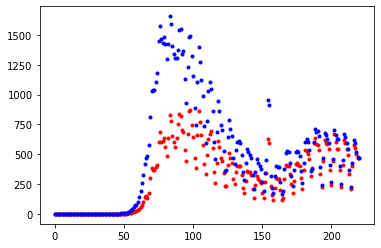

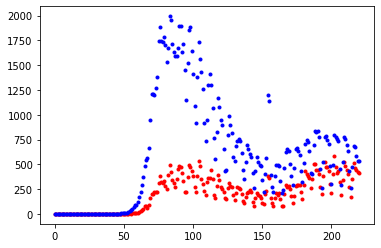

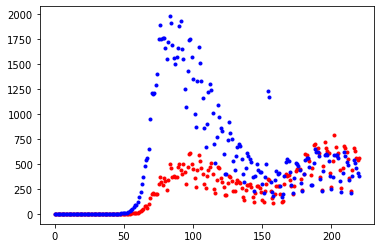

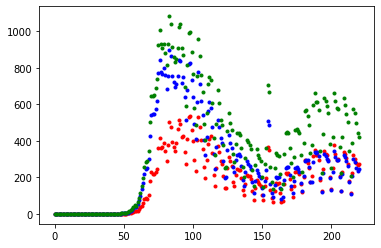

In [9]:
if datatype == 7:
    vote1=dataset2.to_numpy()
    govs1=dataset3.to_numpy()
    print('dataset1.shape',dataset1.shape,'dataset3.shape',dataset3.shape,'govs1.shape',govs1.shape)
    print('govs1[4,6]',govs1[4,6])
    dd1=dataset1.loc[dataset1['iso2']=='US']
    print('dd1.shape',dd1.shape)
    dd1=dd1.loc[dd1['FIPS']<56046] # Hopkins_US_deaths_county_08302020.csv in particular
#                                    has extraneous data, eg FIPS=90004 unassigned AZ
    print('dd1.shape',dd1.shape)
    dd1=dd1.to_numpy()
    dd1=dd1[dd1[:,4].argsort()]
    dd1d=dd1[:,12:] # this is the Hopkins data with only the death columns 1/22 onward
    print('dd1.shape',dd1.shape,'vote1.shape',vote1.shape,'dd1d.shape',dd1d.shape)
    vote2=vote1[vote1[:,10].argsort()] # sort table by county fips
    fipsv=vote2[:,10]
    fipsc=dd1[:,0].astype(int)-100000*np.trunc(dd1[:,0].astype(int)/100000.)
    fipsc2=dd1[:,4]
    vdemsr=vote2[:,4]
    dd2cols=dd1.shape[1]
#
#    for ii in range (dd1.shape[0]):
#        print('ii',ii,'fipsc[ii]',fipsc[ii],'fipsc2[ii]',fipsc2[ii])

# create a comma-separated list of states and counties and their fips codes
    file1=open('County_data/FIPS_county.txt','r')
    counts=0
    countc=0
    ncount=3145 # number of counties in FIPS_county.txt - verified in countc loop below
    state_list=[['' for i in range (2)] for j in range(51)]
    county_list=[['' for i in range (2)] for j in range(ncount)]

# get list of states and counties from FIPS_county.txt
    while True:
        line = file1.readline() # this is a different way to read files, perhaps useful
        if len(line) == 0:
            break
        fips = float(line[0:5])
        state_f=int(fips/1000)
        if int(line[0:5]) != 0: # all zeros is USA
            d1=int(fips-state_f*1000)
            if d1 == 0: # in addition to county lines, there are lines for each state
# and the 1st line is just USA
                state_list[counts][0]=line[0:5]
                state_list[counts][1]=line[6:len(line)-1]
                print('counts',counts,'fips',fips,'state_list[counts]',state_list[counts])
                counts+=1

            else:
                county_list[countc][0]=line[0:5]
                county_list[countc][1]=line[6:len(line)-1]
                countc+=1
                
    FIPS=np.array(county_list)[:,0].astype(int)

    print('counts',counts,'countc',countc,'FIPS.shape',FIPS.shape)

# governor data
    jj=0
    gg=np.zeros((51,2))
    state_list_np=np.asarray(state_list)
    for ii in range(counts):
        if state_list[ii][1]=='DISTRICT OF COLUMBIA':
            gg[ii,0]=state_list_np[ii][0]
            gg[ii,1]=0.5
        elif govs1[jj,6] == 'republican':
            gg[ii,0]=state_list_np[ii][0]
            gg[ii,1]=1.0
            jj+=1
        else:
            gg[ii,0]=state_list_np[ii][0]
            gg[ii,1]=0.0
            jj+=1
            
#        print('ii',ii,'jj',jj,'state_list[ii][1]',state_list[ii][1],'govs1[jj-1,6]',govs1[jj-1,6], \
#             'gg[ii,0]',gg[ii,0],gg[ii,1])

    arr11=gg[:,0].tolist()
    arr22=gg[:,1].tolist()
    d=dict(zip(arr11,arr22))
    print('d',d,'d(4000.0)',d[5000.0])
        #print('county_list',county_list)
#print('county_list',county_list[2][0])
    countc=countc
    counts=counts
    jj=0
    kk=0
    dline0=np.zeros(dd2cols-12) # 12 columns of non-death data
    print('dline0.shape',dline0.shape)
    lineout=np.zeros(dd2cols-12+5) # 0th and 1st elements are FIPS and vote
    Data1=np.zeros((countc,dd2cols-12+5))
    arr1=np.setdiff1d(FIPS,fipsc)
    arr1b=np.setdiff1d(fipsc,FIPS)
    arr2=np.setdiff1d(FIPS,fipsv)
    arr2b=np.setdiff1d(fipsv,FIPS)
    arr3=np.setdiff1d(FIPS,fipsp)
    arr3b=np.setdiff1d(fipsp,FIPS)
    
    print('arr1',arr1,'\n arr1b',arr1b,'\n arr2',arr2,'\n arr2b',arr2b, \
         '\n arr3',arr3,'\n arr3b',arr3b)
    for ii in range(countc):
        if np.isin(FIPS[ii],arr1):
            print('skip','ii',ii,'FIPS',FIPS[ii],'fipsc[jj]',fipsc[jj])
            dline=dline0
        else:
            dline=dd1d[jj]
            pop1=pop[jj,1]
            jj+=1

        if np.isin(FIPS[ii],arr2):
            print('skip','ii',ii,'FIPS',FIPS[ii],'fipsv[kk]',fipsv[kk])
            vote=0
        else:
            state_f=int(FIPS[ii]/1000)
            if state_f == 2: # modified for missing Alaska data
                frac=1.0/31.0
            else:
                frac=1.0
            
            vote=vote2[kk,5]
            voteD=vote2[kk,1]*frac
            voteR=vote2[kk,2]*frac
            kk+=1

#        print('FIPS',FIPS[ii],'vote',vote)
        lineout[0]=FIPS[ii]
        lineout[1]=vote
        lineout[2]=voteD
        lineout[3]=voteR
        lineout[4]=pop1*230.0/330.0
        lineout[5:]=dline
        
        Data1[ii,:]=lineout
#        print('ii',ii,'FIPS',FIPS[ii],'jj-1',jj-1,'fipsc[jj-1]',fipsc[jj-1],'vote',vote,'deaths',lineout[-1])
        if FIPS[ii] != fipsc[jj-1]:
            print('FIPS[ii]',FIPS[ii],'fipsc[jj-1]',fipsc[jj-1])
#            wait=input('holding')

#        if fipsc[ii] != FIPS[ii]:
#            dline=dline0
            
#            print(ii,'FIPS',FIPS[ii],'fipsc',fipsc[ii],'fipsv',fipsv[ii])
#    print('Data1',Data1[:2,:])
    FIPSr=FIPS.astype(np.float)
#    print('FIPSr',FIPSr)
    Rdeaths=np.zeros((countc,dd2cols-12))
    Ddeaths=np.zeros((countc,dd2cols-12))
    RdeathsB=np.zeros((countc,dd2cols-12))
    DdeathsB=np.zeros((countc,dd2cols-12))
    RdeathsC=np.zeros((countc,dd2cols-12))
    DdeathsC=np.zeros((countc,dd2cols-12))
    RdeathsD=np.zeros((countc,dd2cols-12))
    DdeathsD=np.zeros((countc,dd2cols-12))
    NdeathsD=np.zeros((countc,dd2cols-12))
    Control=np.rint(Data1[:,1])
    
    aa=27
    print("aa: %4d" % aa)
    for ii in range (countc):
        Rdeaths[ii,:]=Data1[ii,1]*Data1[ii,5:]
        Ddeaths[ii,:]=(1.0-Data1[ii,1])*Data1[ii,5:]
        RdeathsB[ii,:]=Control[ii]*Data1[ii,5:]
        DdeathsB[ii,:]=(1.0-Control[ii])*Data1[ii,5:]
        stateA=1000.0*int(FIPSr[ii]/1000)
        Control2=(Control[ii]+d[stateA])*0.5
        RdeathsC[ii,:]=Control2*Data1[ii,5:]
        DdeathsC[ii,:]=(1.0-Control2)*Data1[ii,5:]
        RdeathsD[ii,:]=(Data1[ii,3]/Data1[ii,4])*Data1[ii,5:]
        DdeathsD[ii,:]=(Data1[ii,2]/Data1[ii,4])*Data1[ii,5:]
        NdeathsD[ii,:]=((Data1[ii,4]-Data1[ii,2]-Data1[ii,3])/Data1[ii,4])*Data1[ii,5:]
#        print('ii',ii,'FIPS',Data1[ii,0],'RdeathsD',RdeathsD[ii,-1],'DdeathsD', \
#              DdeathsD[ii,-1],'NdeathsD',NdeathsD[ii,-1], \
#              'rpct',Data1[ii,1])
        turnout=(Data1[ii,2]+Data1[ii,3])/Data1[ii,4]
        print('ii',ii,'FIPS %4d' % Data1[ii,0],'Rd %6.1f' % Data1[ii,3], \
             'Dd %6.1f' % Data1[ii,2],'Pop %6.1f' % Data1[ii,4],'turnout %4.3f ' \
              % turnout)


    Rdeaths_total=np.sum(Rdeaths,axis=0)
    Ddeaths_total=np.sum(Ddeaths,axis=0)
    print('Rdeaths_total[-1]',Rdeaths_total[-1])
    print('Ddeaths_total[-1]',Ddeaths_total[-1])
    Rdday=np.gradient(Rdeaths_total)
    Ddday=np.gradient(Ddeaths_total)
    
    Rdeaths_totalB=np.sum(RdeathsB,axis=0)
    Ddeaths_totalB=np.sum(DdeathsB,axis=0)
    print('Rdeaths_totalB[-1]',Rdeaths_totalB[-1])
    print('Ddeaths_totalB[-1]',Ddeaths_totalB[-1])
    RddayB=np.gradient(Rdeaths_totalB)
    DddayB=np.gradient(Ddeaths_totalB)
    
    Rdeaths_totalC=np.sum(RdeathsC,axis=0)
    Ddeaths_totalC=np.sum(DdeathsC,axis=0)
    print('Rdeaths_totalC[-1]',Rdeaths_totalC[-1])
    print('Ddeaths_totalC[-1]',Ddeaths_totalC[-1])
    RddayC=np.gradient(Rdeaths_totalC)
    DddayC=np.gradient(Ddeaths_totalC)
    
    Rdeaths_totalD=np.sum(RdeathsD,axis=0)
    Ddeaths_totalD=np.sum(DdeathsD,axis=0)
    Ndeaths_totalD=np.sum(NdeathsD,axis=0)
    print('Rdeaths_totalD[-1]',Rdeaths_totalD[-1])
    print('Ddeaths_totalD[-1]',Ddeaths_totalD[-1])
    print('Ndeaths_totalD[-1]',Ndeaths_totalD[-1])
    RddayD=np.gradient(Rdeaths_totalD)
    DddayD=np.gradient(Ddeaths_totalD)
    NddayD=np.gradient(Ndeaths_totalD)
    f1=pyplot.figure()
    pyplot.plot(Rdday,'.r',Ddday,'.b')
    pyplot.show()
    f2=pyplot.figure()
    pyplot.plot(RddayB,'.r',DddayB,'.b')
    pyplot.show()
    f3=pyplot.figure()
    pyplot.plot(RddayC,'.r',DddayC,'.b')
    pyplot.show()
    f4=pyplot.figure()
    pyplot.plot(RddayD,'.r',DddayD,'.b',NddayD,'.g')
    pyplot.show()